In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('TRAIN.csv')
test = pd.read_csv('TEST_FINAL.csv')

In [3]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [4]:
train.shape

(188340, 10)

In [5]:
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [6]:
test.shape

(22265, 8)

In [13]:
train.dtypes

ID                object
Store_id           int64
Store_Type        object
Location_Type     object
Region_Code       object
Date              object
Holiday            int64
Discount          object
#Order             int64
Sales            float64
dtype: object

In [7]:
train.describe(include='all')

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
count,188340,188340.000000,188340,188340,188340,188340,188340.000000,188340,188340.000000,188340.000000
unique,188340,NaN,4,5,4,516,NaN,2,NaN,NaN
top,T1040816,NaN,S1,L1,R1,2018-02-25,NaN,No,NaN,NaN
freq,1,NaN,88752,85140,63984,365,NaN,104051,NaN,NaN
mean,NaN,183.000000,NaN,NaN,NaN,NaN,0.131783,NaN,68.205692,42784.327982
std,NaN,105.366308,NaN,NaN,NaN,NaN,0.338256,NaN,30.467415,18456.708302
min,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000
25%,NaN,92.000000,NaN,NaN,NaN,NaN,0.000000,NaN,48.000000,30426.000000
50%,NaN,183.000000,NaN,NaN,NaN,NaN,0.000000,NaN,63.000000,39678.000000
75%,NaN,274.000000,NaN,NaN,NaN,NaN,0.000000,NaN,82.000000,51909.000000


In [8]:
train.Store_id.value_counts()

128    516
84     516
211    516
83     516
338    516
      ... 
168    516
40     516
295    516
167    516
255    516
Name: Store_id, Length: 365, dtype: int64

In [10]:
train.Holiday.value_counts()

0    163520
1     24820
Name: Holiday, dtype: int64

In [15]:
train.drop(['ID'],axis=1,inplace=True)
test.drop(['ID'],axis=1,inplace=True)

In [16]:
train.head()

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [17]:
train.Date.value_counts()

2018-02-25    365
2019-01-30    365
2018-08-11    365
2018-02-07    365
2018-04-07    365
             ... 
2019-03-01    365
2018-10-02    365
2018-12-14    365
2019-01-21    365
2018-10-17    365
Name: Date, Length: 516, dtype: int64

In [25]:
train['month'] = ''
train.head()

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,month
0,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,
1,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,
2,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,
3,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,
4,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,


In [26]:
def month(date):
    return date.split('-')[1]

train['month'] = train['Date'].apply(lambda date : month(date))
train

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,month
0,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,01
1,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,01
2,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,01
3,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,01
4,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,01
...,...,...,...,...,...,...,...,...,...,...
188335,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00,05
188336,153,S4,L2,R1,2019-05-31,1,No,90,54572.64,05
188337,154,S1,L3,R2,2019-05-31,1,No,56,31624.56,05
188338,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41,05


In [27]:
test['month'] = test['Date'].apply(lambda date : month(date))
test

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,month
0,171,S4,L2,R3,2019-06-01,0,No,06
1,172,S1,L1,R1,2019-06-01,0,No,06
2,173,S4,L2,R1,2019-06-01,0,No,06
3,174,S1,L1,R4,2019-06-01,0,No,06
4,170,S1,L1,R2,2019-06-01,0,No,06
...,...,...,...,...,...,...,...,...
22260,186,S2,L5,R2,2019-07-31,0,No,07
22261,11,S4,L2,R1,2019-07-31,0,No,07
22262,185,S1,L1,R3,2019-07-31,0,Yes,07
22263,69,S1,L1,R4,2019-07-31,0,No,07


In [28]:
train.drop(['Date'],axis=1,inplace=True)
test.drop(['Date'],axis=1,inplace=True)

In [29]:
train.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,#Order,Sales,month
0,1,S1,L3,R1,1,Yes,9,7011.84,01
1,253,S4,L2,R1,1,Yes,60,51789.12,01
2,252,S3,L2,R1,1,Yes,42,36868.20,01
3,251,S2,L3,R1,1,Yes,23,19715.16,01
4,250,S2,L3,R4,1,Yes,62,45614.52,01


In [30]:
train.drop(['#Order'],axis=1,inplace=True)

In [33]:
train = train.astype({'Store_id':'object' , 'Holiday':'object'})

In [35]:
test = test.astype({'Store_id':'object' , 'Holiday':'object'})

In [36]:
train.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales,month
0,1,S1,L3,R1,1,Yes,7011.84,01
1,253,S4,L2,R1,1,Yes,51789.12,01
2,252,S3,L2,R1,1,Yes,36868.20,01
3,251,S2,L3,R1,1,Yes,19715.16,01
4,250,S2,L3,R4,1,Yes,45614.52,01


<AxesSubplot:xlabel='Sales', ylabel='Density'>

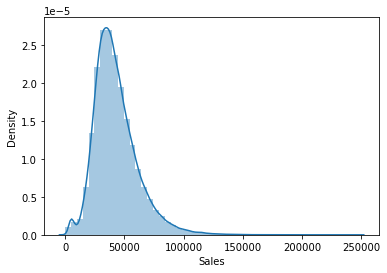

In [46]:
sns.distplot(train.Sales)

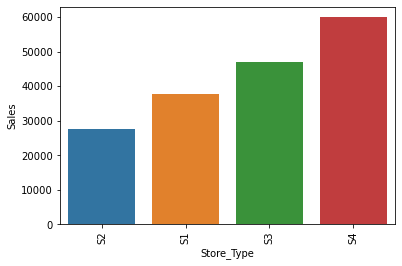

In [39]:
b = pd.pivot_table(train, index='Store_Type', values = 'Sales').sort_values(by = 'Sales')
chart = sns.barplot(x=b.index,y=b['Sales'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

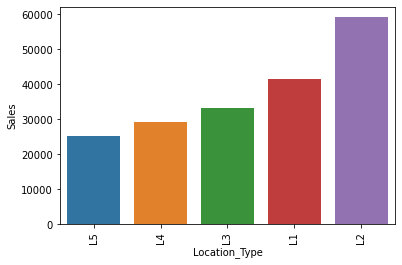

In [40]:
b = pd.pivot_table(train, index='Location_Type', values = 'Sales').sort_values(by = 'Sales')
chart = sns.barplot(x=b.index,y=b['Sales'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

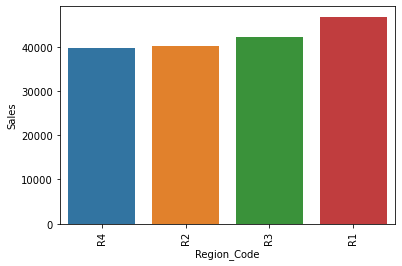

In [41]:
b = pd.pivot_table(train, index='Region_Code', values = 'Sales').sort_values(by = 'Sales')
chart = sns.barplot(x=b.index,y=b['Sales'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

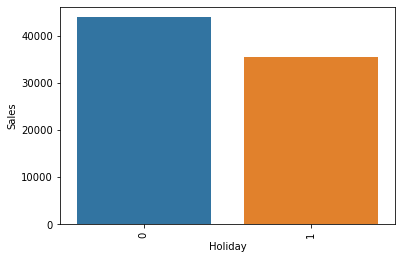

In [43]:
b = pd.pivot_table(train, index='Holiday', values = 'Sales').sort_values(by = 'Sales')
chart = sns.barplot(x=b.index,y=b['Sales'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

<AxesSubplot:xlabel='Holiday', ylabel='count'>

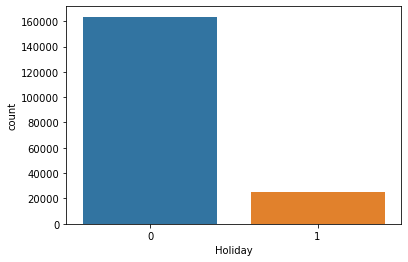

In [48]:
sns.countplot(train.Holiday)

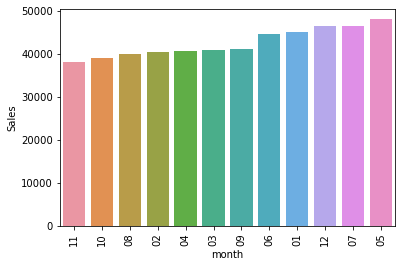

In [44]:
b = pd.pivot_table(train, index='month', values = 'Sales').sort_values(by = 'Sales')
chart = sns.barplot(x=b.index,y=b['Sales'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

In [47]:
train.drop(['Region_Code'],axis=1,inplace=True)
test.drop(['Region_Code'],axis=1,inplace=True)